In [16]:
from Procedures import *
from Preprocess import readStopWords

import pandas as pd
import os

/home/chengyuli/miniconda3/envs/ML/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/chengyuli/miniconda3/envs/ML/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


num_topics = 1
Perplexity = 278.7023586674138
Coherence = 0.2999920198017582
num_topics = 2
Perplexity = 372.37360707386154
Coherence = 0.561707653244682
num_topics = 3
Perplexity = 423.31914077379633
Coherence = 0.5903181407157153
num_topics = 4
Perplexity = 473.1772118762334
Coherence = 0.4799495507527419
num_topics = 5
Perplexity = 442.35480267062144
Coherence = 0.40461077475576834
num_topics = 6
Perplexity = 760.7398494239264
Coherence = 0.512637398995167
num_topics = 7
Perplexity = 658.6575208784363
Coherence = 0.4700672150659201
num_topics = 8
Perplexity = 687.0656937304553
Coherence = 0.4424113772777003
num_topics = 9
Perplexity = 715.8741947588596
Coherence = 0.4556533393168929
num_topics = 10
Perplexity = 945.513116851853
Coherence = 0.4109640707856067


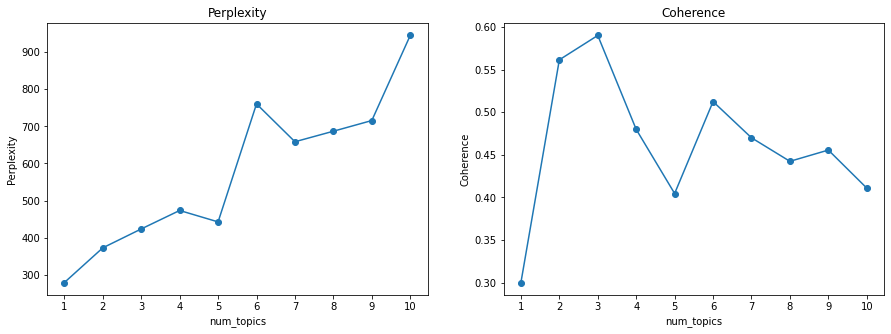

In [18]:
# 读取csv
df = pd.read_csv('/home/chengyuli/yanshan/data/DataScience/finalData/news.csv')

# 读取停用词表
stopwordsPath = "/home/chengyuli/yanshan/data/DataScience/stop_words_ch.txt"
stopwords = readStopWords(stopwordsPath)

# 设置时间片，以天为单位
time_interval = 30
    
# 开始分割时间片
list_df = splitWithTime(df, time_interval, lang='en-us')
    
# 预处理
for each in list_df:
    each['df'] = preprocess(each['df'], stopwords)
    
# (重要) 修改此处来修改需要进行处理的文本集合
df_test = pd.concat([df['df'] for df in list_df])

# 主题提取
num_topics = 10
model_list, dic, corpus_tfidf = TopicExtraction(df_test['contents'].tolist(), num_topics)

/home/chengyuli/miniconda3/envs/ML/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


For n_clusters = 2, the average silhouette_score is : 0.4380966125001544
For n_clusters = 3, the average silhouette_score is : 0.47060954473043715
For n_clusters = 4, the average silhouette_score is : 0.4411037181933328
For n_clusters = 5, the average silhouette_score is : 0.43226011133954984
For n_clusters = 6, the average silhouette_score is : 0.4121371379930517
For n_clusters = 7, the average silhouette_score is : 0.43261674789869664
For n_clusters = 8, the average silhouette_score is : 0.4282129667816872
Best K value based on silhouette score: 3
For n_clusters = 2, the average silhouette_score is : 0.4380966125001544
For n_clusters = 3, the average silhouette_score is : 0.47060954473043715
For n_clusters = 4, the average silhouette_score is : 0.4411037181933328
For n_clusters = 5, the average silhouette_score is : 0.43164728496582533
For n_clusters = 6, the average silhouette_score is : 0.4131111329291765
For n_clusters = 7, the average silhouette_score is : 0.4328490723296317
For 

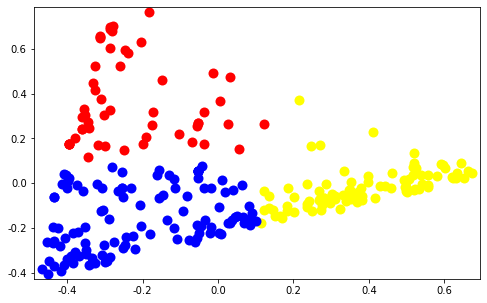

热点话题: [('人道主义', 0.003974484579753031), ('决议', 0.003974484579753031), ('安理会', 0.0033120704831275266), ('平民', 0.0033120704831275266), ('国际', 0.0033120704831275266), ('巴勒斯坦', 0.0026496563865020225), ('人民', 0.0026496563865020225), ('美国', 0.0026496563865020225), ('停火', 0.0026496563865020225), ('联合国', 0.0026496563865020225)], 属于此话题的文档数: 113
字符串热点话题: 人道主义 决议 安理会 平民 国际 巴勒斯坦 人民 美国 停火 联合国
情感分析得分：8
热点话题: [('医院', 0.004438414786496888), ('加沙', 0.004438414786496888), ('人', 0.004438414786496888), ('近东', 0.003804355531283047), ('工程处', 0.003804355531283047), ('救济', 0.003804355531283047), ('厅', 0.003804355531283047), ('地带', 0.003804355531283047), ('死亡', 0.003804355531283047), ('协调', 0.003804355531283047)], 属于此话题的文档数: 92
字符串热点话题: 医院 加沙 人 近东 工程处 救济 厅 地带 死亡 协调
情感分析得分：0
热点话题: [('金砖', 0.005721244970582566), ('中国', 0.004160905433150956), ('推动', 0.003640792254007087), ('总统', 0.0026005658957193485), ('人道主义', 0.0020867349991820893), ('决议', 0.0020867349991820893), ('解决', 0.002080452716575478), ('止战', 0.0020804527

In [30]:
# 选择最优主题个数
topics_count = 6
lda_model = model_list[topics_count - 1]
    
# 热点话题分析
emotional_dict_path = "/home/chengyuli/yanshan/data/DataScience/sentimentDict"
num_words = 10

k = None
    
all_top_k, doc_indexs = hotSpotAnalysis(lda_model=lda_model,
                                        df=df_test,
                                        dic=dic,
                                        topic_nums=topics_count,
                                        num_words=num_words,
                                        emotional_dict_path=emotional_dict_path,
                                        k=k)

/home/chengyuli/miniconda3/envs/ML/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


final字符串热点话题: 人道主义 决议 安理会 平民 国际 巴勒斯坦 人民 美国 停火 联合国 医院 加沙 人 近东 工程处 救济 厅 地带 死亡 协调 金砖 中国 推动 总统 人道主义 决议 解决 止战 峰会 主席


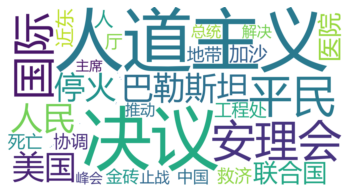

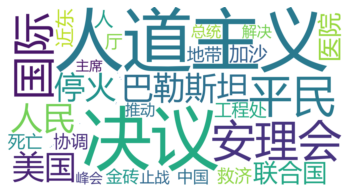

In [31]:
# 可视化
basedir = "/home/chengyuli/yanshan/CodeRepo/DataScience/"
wordCloud_pic_path = "/home/chengyuli/yanshan/data/DataScience/WordCloud/Tu-160.jpg"
wordCloud_font_path = "/home/chengyuli/yanshan/data/DataScience/WordCloud/MSYH.ttc"

wordCloud_save_path = os.path.join(os.path.dirname(basedir), "output/wordCloud.jpg")
pyLDAvis_save_path = os.path.join(os.path.dirname(basedir), "output/topic.html")

visualize(lda_model=lda_model,
          corpus_tfidf=corpus_tfidf,
          dic=dic,
          pyLDAvis_save_path=pyLDAvis_save_path,
          all_top_k=all_top_k,
          wordCloud_pic_path=wordCloud_pic_path,
          wordCloud_font_path=wordCloud_font_path,
          wordCloud_save_path=wordCloud_save_path) 

In [32]:
# SVM预测
topic_doc = merge(all_top_k, doc_indexs)

# 待预测数据
new_text_data = list_df[-1]['df']['contents'].apply(" ".join).tolist()

doc_list = df_test['contents'].tolist()

# 进行预测
topic_prob = SVM_Predict(new_documents=new_text_data, topic_doc=topic_doc, doc_list=doc_list)
# print(topic_prob)

/home/chengyuli/miniconda3/envs/ML/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


已有的热点话题为['医院 加沙 人 近东 工程处 救济 厅 地带 死亡 协调', '金砖 中国 推动 总统 人道主义 决议 解决 止战 峰会 主席', '人道主义 决议 安理会 平民 国际 巴勒斯坦 人民 美国 停火 联合国']
总共有类别数：3
Accuracy: 0.8076923076923077
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.78      0.82      0.80        17
           2       0.71      0.62      0.67         8

    accuracy                           0.81        52
   macro avg       0.78      0.77      0.77        52
weighted avg       0.81      0.81      0.81        52



In [33]:
threshold = 5
trust = 0.8

Judge(topic_prob, threshold, trust)

Maybe new topic merges, need to rerun LDA.


/home/chengyuli/miniconda3/envs/ML/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
